In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import geopandas
import matplotlib.ticker
import scipy.stats
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
datadir = thisdir + 'datasets_for_analysis/'
shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'
figdir = thisdir + 'figures/'

debug = 1

print('ok')

ok


In [2]:
df = pandas.read_csv(datadir+'reinvestment_by_census_tract_for_smallest_businesses.csv', encoding='utf-8')#, index_col=['census_tract', 'activity_year'])

cra_info_columns = ['census_tract', 'activity_year', 'income_group_code', 'income_group', 'cra_level']

cra_loan_columns = ['nLoans1', 'nLoans100k', 'nLoans250k']
cra_loan_columns += ['nLoansToSmallest', 'nLoansTotal', 'nWorkingLoans']
cra_loan_columns += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj']
cra_loan_columns += ['amtLoansToSmallest_adj', 'amtLoansTotal_adj', 'amtWorkingLoans_adj']

census_columns = ['census_tract', 'pop_total', 'total_householders', 'pop_white', 'pop_black']
census_columns += ['black_householder', 'white_householder', 'owner_occ_housing_units', 'mfi']
census_columns += ['female_householder', 'hs_grad_25plus', 'unemployed_16plus']
census_columns += ['poverty_past_12_months', 'median_home_value', 'median_year_built']
census_columns += ['pop_25plus', 'labor_force_16plus', 'poverty_status_known_last12months_total']

census_error_columns = ['census_tract', 'pop_total_err', 'total_householders_err', 'pop_white_err', 'pop_black_err']
census_error_columns += ['black_householder_err', 'white_householder_err', 'owner_occ_housing_units_err', 'mfi_err']
census_error_columns += ['female_householder_err', 'hs_grad_25plus_serr', 'unemployed_16plus_err']
census_error_columns += ['poverty_past_12_months_err', 'median_home_value_err', 'median_year_built_err']
census_error_columns += ['pop_25plus_serr', 'labor_force_16plus_err', 'poverty_status_known_last12months_total_err']

jobs_columns = ['census_tract']
jobs_columns += [x for x in df.columns.tolist() if 'jobs' in x.lower()]

census_tract_list = df['census_tract'].dropna().drop_duplicates().sort_values().tolist()

census_tracts_df = pandas.DataFrame(census_tract_list, columns=['census_tract'])
census_tracts_df = census_tracts_df.set_index('census_tract')
census_tracts_df = census_tracts_df.assign(nYears = df.groupby('census_tract').size())

census_tracts_df = census_tracts_df.join(df.groupby('census_tract')[cra_loan_columns].sum(), how='left')

census_tracts_df = census_tracts_df.join(df[jobs_columns][df['activity_year'] == 2015].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.join(df[census_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')
census_tracts_df = census_tracts_df.join(df[census_error_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.join(df[cra_info_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.assign(nLoans1_per_sbjob = census_tracts_df['nLoans1'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans100k_per_sbjob = census_tracts_df['nLoans100k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans250k_per_sbjob = census_tracts_df['nLoans250k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansToSmallest_per_sbjob = census_tracts_df['nLoansToSmallest'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansTotal_per_sbjob = census_tracts_df['nLoansTotal'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nWorkingLoans_per_sbjob = census_tracts_df['nWorkingLoans'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans1_adj_per_sbjob = census_tracts_df['amtLoans1_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans100k_adj_per_sbjob = census_tracts_df['amtLoans100k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans250k_adj_per_sbjob = census_tracts_df['amtLoans250k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoansTotal_adj_per_sbjob = census_tracts_df['amtLoansTotal_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtWorkingLoans_adj_per_sbjob = census_tracts_df['amtWorkingLoans_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
   
per_job_columns = ['nLoans1_per_sbjob', 'nLoans100k_per_sbjob', 'nLoans250k_per_sbjob']
per_job_columns += ['nLoansToSmallest_per_sbjob', 'nLoansTotal_per_sbjob']
per_job_columns += ['nWorkingLoans_per_sbjob', 'amtLoans1_adj_per_sbjob']
per_job_columns += ['amtLoans100k_adj_per_sbjob', 'amtLoans250k_adj_per_sbjob']
per_job_columns += ['amtLoansTotal_adj_per_sbjob', 'amtWorkingLoans_adj_per_sbjob']

print('fixing loans per job for tracts with zero jobs...')
for thiscol in per_job_columns:
    census_tracts_df.loc[census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] == 0, thiscol] = np.nan

print('backing up...')
census_tracts_df_bk = census_tracts_df
print('ok')
#cra_info_columns

fixing loans per job for tracts with zero jobs...
backing up...
ok


In [3]:
print('retrieving from backup...')
census_tracts_df_bk = census_tracts_df

census_tracts_df = census_tracts_df.assign(poverty_rate = census_tracts_df['poverty_past_12_months'] / census_tracts_df['poverty_status_known_last12months_total'])
census_tracts_df = census_tracts_df.assign(pct_white =  census_tracts_df['pop_white'] / census_tracts_df['pop_total'])
census_tracts_df = census_tracts_df.assign(pct_black =  census_tracts_df['pop_black'] / census_tracts_df['pop_total'])

census_tracts_df = census_tracts_df.assign(excess_race = np.nan)
census_tracts_df.loc[census_tracts_df['pct_black'] > 0.65, 'excess_race'] = 'black'
census_tracts_df.loc[census_tracts_df['pct_black'] <= 0.65, 'excess_race'] = 'white'

print('census tracts by excess race:')
print(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('excess_race').size())

print('\n')

print('Quantiles of poverty rate in Baltimore city:')
print('Median {0:.1%}, richest decile {1:.1%}, richest quartile {2:.1%}, poorest quartile {3:.1%}, poorest decile {4:.1%}'.format(
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.5), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.1), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.25), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.75), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.9)
))

print('\n')
print("OK, sure, let's use Chicago's definition of low poverty as <= 10% poverty rate")

census_tracts_df = census_tracts_df.assign(poverty_class = np.nan)
census_tracts_df.loc[census_tracts_df['poverty_rate'] < 0.1, 'poverty_class'] = 'low'
census_tracts_df.loc[census_tracts_df['poverty_rate'] >= 0.1, 'poverty_class'] = 'high'

print('census tracts by poverty class:')
print(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('poverty_class').size())

print('backing up...')
census_tracts_df_bk = census_tracts_df


retrieving from backup...
census tracts by excess race:
excess_race
black    107
white     79
dtype: int64


Quantiles of poverty rate in Baltimore city:
Median 22.1%, richest decile 7.6%, richest quartile 13.0%, poorest quartile 31.6%, poorest decile 41.2%


OK, sure, let's use Chicago's definition of low poverty as <= 10% poverty rate
census tracts by poverty class:
poverty_class
high    152
low      34
dtype: int64
backing up...


## Get shapefiles

Getting census tract shapefiles for 2017...
cutting out harbor (thanks Darius!)...
backing up...


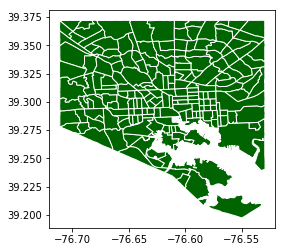

In [4]:
thisyear = 2017

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_24_tract.shp'.format(thisyear))
tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '510']
tract_shapes_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_shapes_gdf['NAME'], errors='coerce')
tract_shapes_gdf = tract_shapes_gdf.assign(census_tract = pandas.to_numeric(tract_shapes_gdf['GEOID'].apply(lambda x: x[5:9]+'.'+x[9:]), errors='coerce'))
tract_shapes_gdf = tract_shapes_gdf.drop('GEOID', axis=1)
tract_shapes_gdf = tract_shapes_gdf.set_index('census_tract')

print('cutting out harbor (thanks Darius!)...')
water_gdf = geopandas.read_file(shapefile_basedir+'water/water.shp')
water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)

tract_shapes_gdf = geopandas.overlay(tract_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

tract_shapes_gdf.plot(color='darkgreen', edgecolor='white')

print('backing up...')
tract_shapes_gdf_bk = tract_shapes_gdf

plt.show()


## Join shapefiles to data

In [5]:
print('getting from backup...')
census_tracts_df = census_tracts_df_bk
tract_shapes_gdf = tract_shapes_gdf_bk

census_tracts_df = census_tracts_df.join(tract_shapes_gdf, how='left')#, lsuffix='_loans', rsuffix='_shapes')#[['GEOID_loans', 'GEOID_shapes']]
census_tracts_gdf = geopandas.GeoDataFrame(census_tracts_df, crs=tract_shapes_gdf.crs)

print('backing up...')
census_tracts_gdf_bk = census_tracts_gdf

print('ok')


getting from backup...
backing up...
ok


getting from backup...


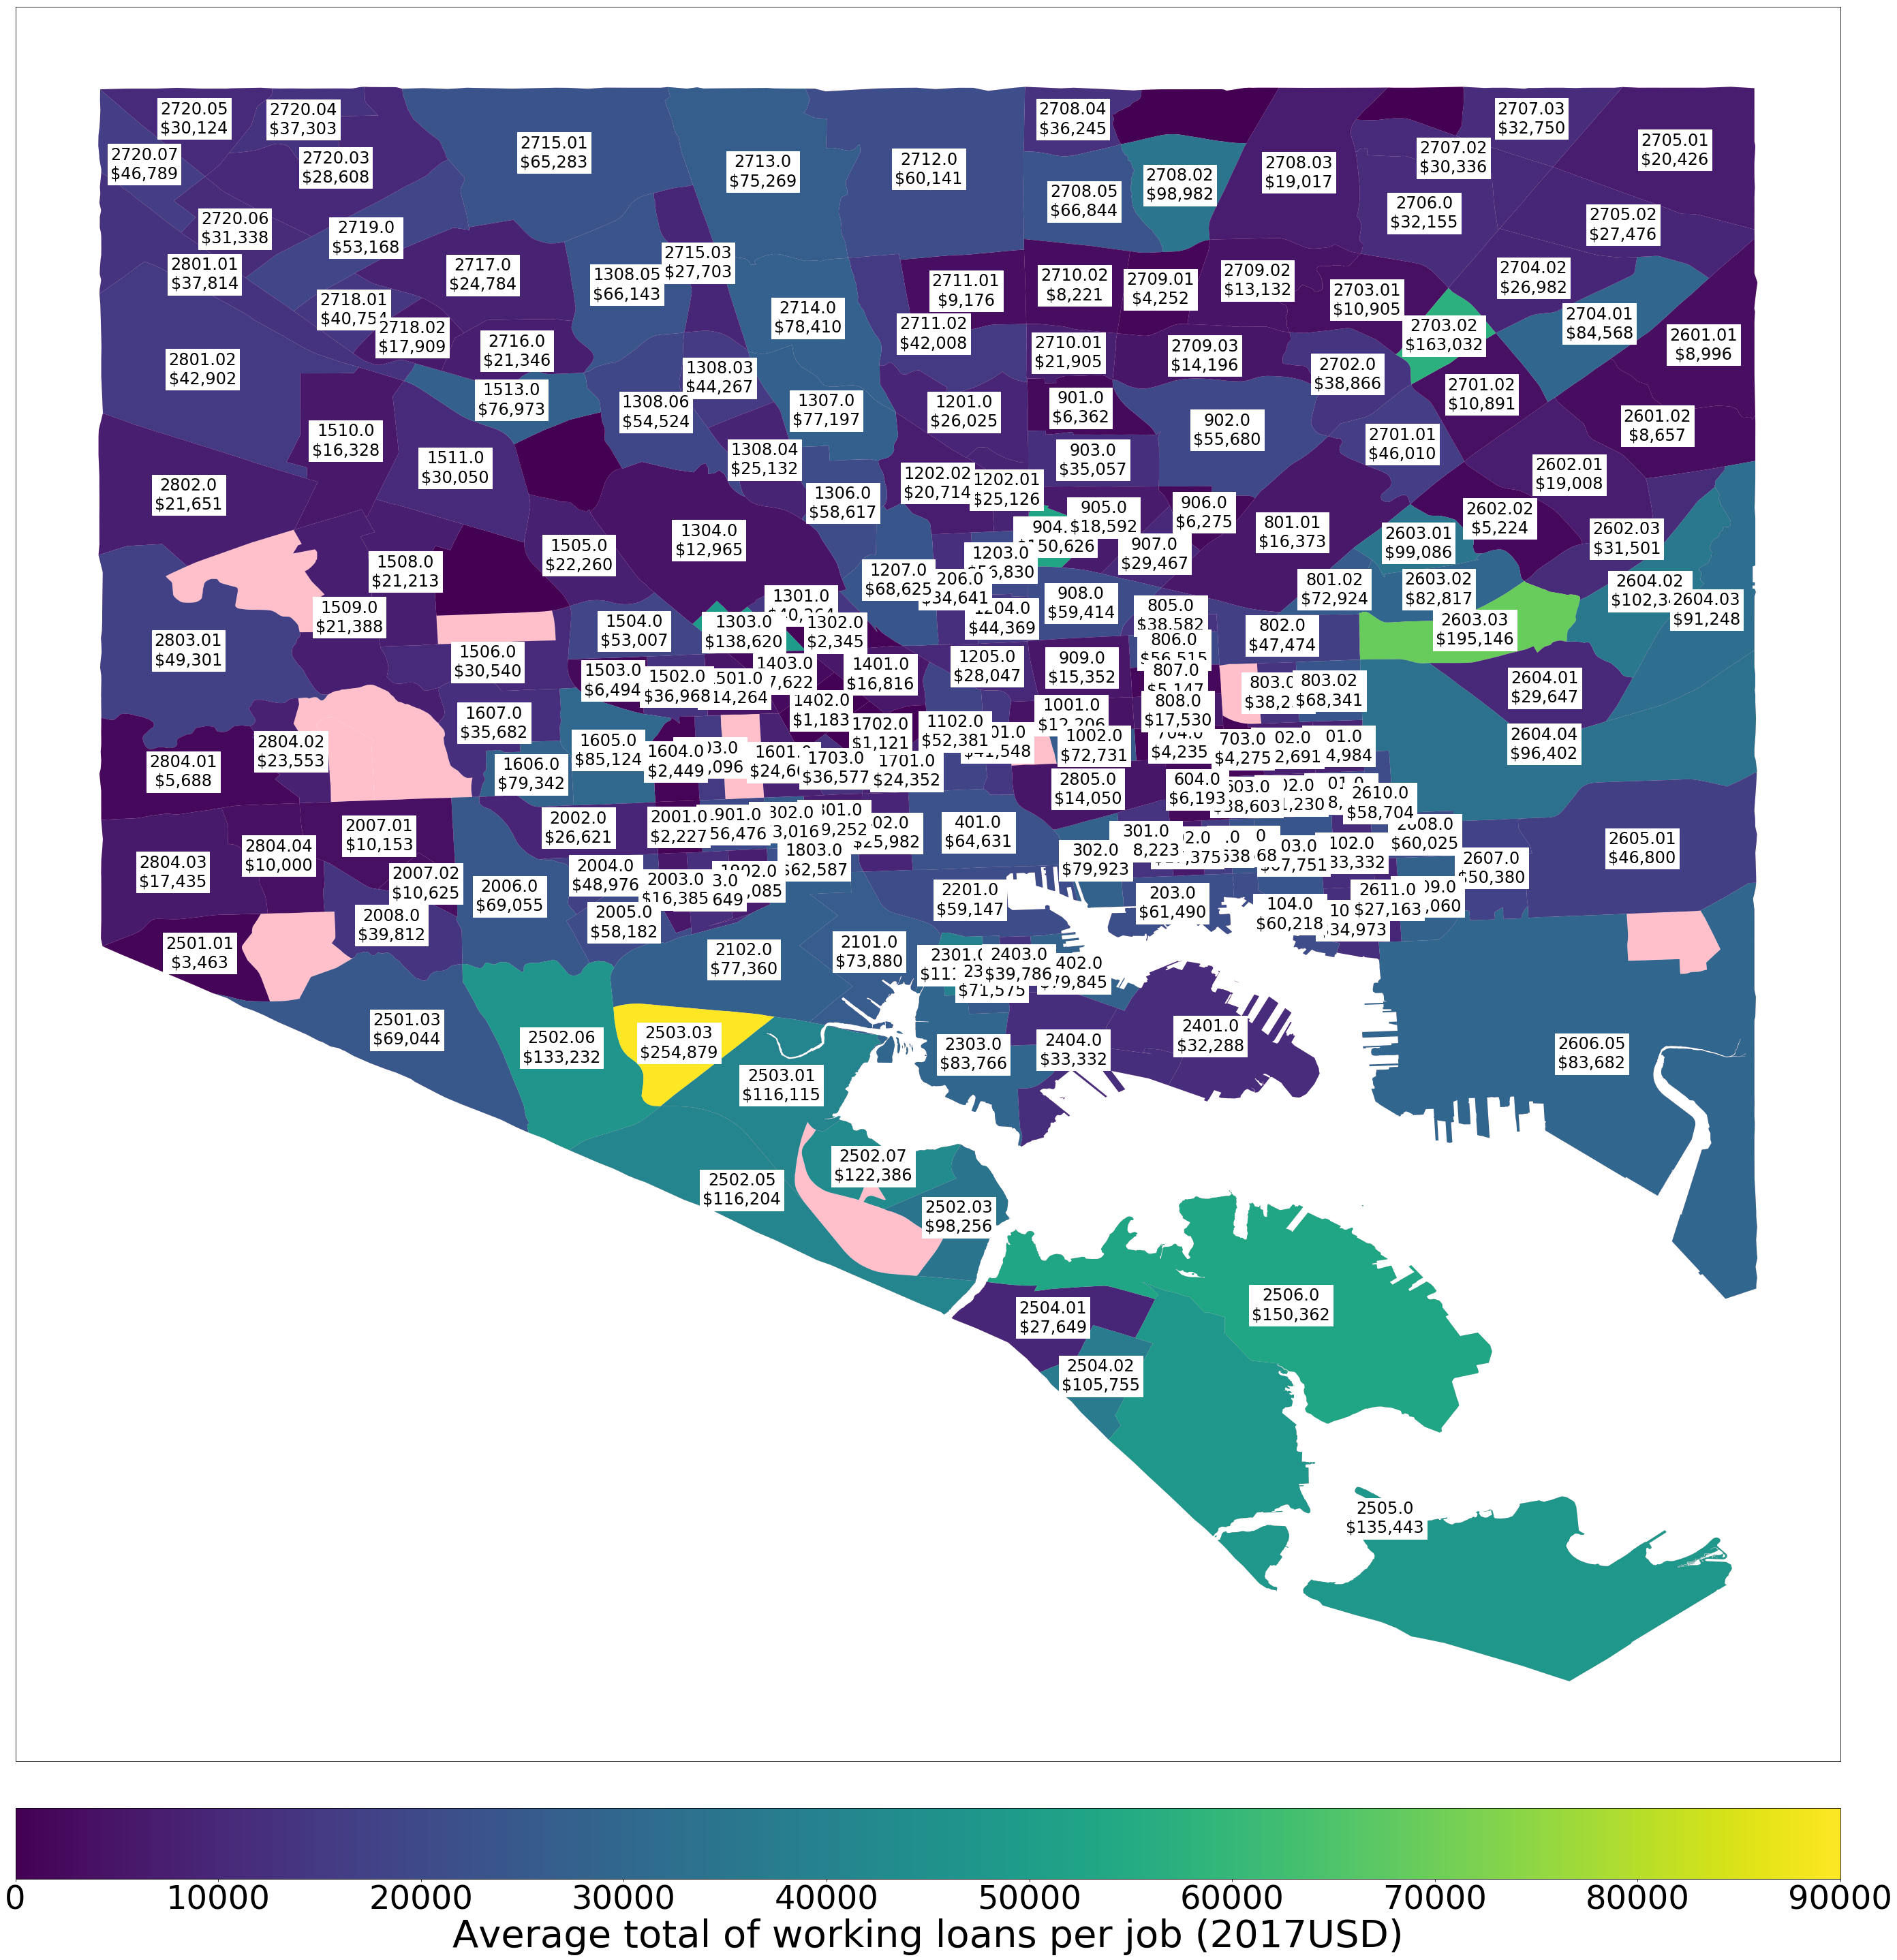

In [6]:
print('getting from backup...')
census_tracts_gdf = census_tracts_gdf_bk

scale = 1
show_labels = True

fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))
census_tracts_gdf.plot(color='pink', ax=ax)
census_tracts_gdf[
    (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 10)
].plot(column='amtWorkingLoans_adj_per_sbjob', ax=ax)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)

if (show_labels):
    for ix, thisrow in census_tracts_gdf[
        (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
        & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 10)
    ].iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sbjob'] > 0):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator += '\n'
            annotator += '${:,.0f}'.format(thisrow['amtWorkingLoans_adj_per_sbjob'])
            annotator = annotator.upper()
            ax.annotate(annotator, 
                        xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        xytext=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        ha='center', va='center', fontsize=24*scale, color='black', 
                         backgroundcolor='white')

cax = fig.add_axes([0.125, 0.08, 0.775, 0.03])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=90000))
# fake up the array of the scalar mappable. Urgh...
sm._A = []

cbar = fig.colorbar(sm, cax=cax, format='%.0f', orientation='horizontal') #, ticks=np.arange(0, 90001, 10000))

cax.tick_params(labelsize=48*scale)

cbar.set_label('Average total of working loans per job (2017USD)', fontsize=56*scale)

plt.show()
#scale = 2
#census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'][
#    census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull()
#].sort_values(ascending=False)

#fig, ax = plt.subplots(1,1,figsize=(20*scale,20*scale))

#census_tracts_gdf.loc[2503.03]


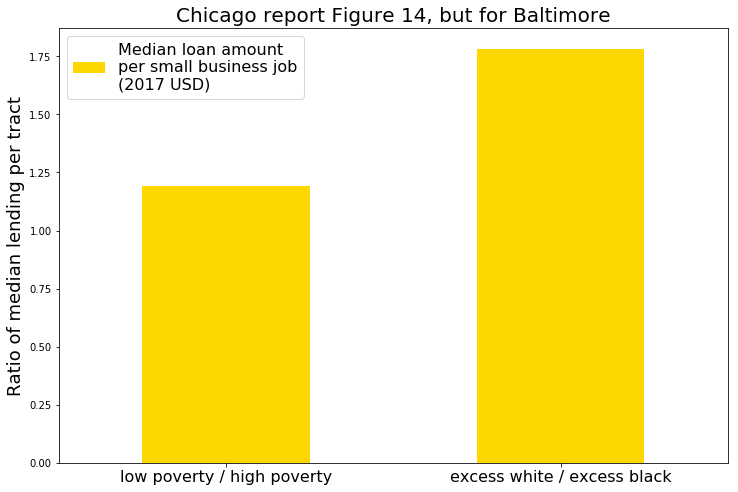

Excess Race,Median loan amount per small business job
white,"$50,380"
black,"$25,802"
Poverty class,Median loan amount per small business job
low,"$43,138"
high,"$36,245"


In [7]:
htmlstring = '<table>'
htmlstring += '<tr><th>Excess Race</th><th>Median loan amount per small business job</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('white', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['excess_race'] == 'white')].median())
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('black', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['excess_race'] == 'black')].median())
htmlstring += '</table>'

htmlstring += '<p>&nbsp;</p>'

htmlstring += '<table>'
htmlstring += '<tr><th>Poverty class</th><th>Median loan amount per small business job</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('low', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'low')].median())
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('high', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'high')].median())
htmlstring += '</table>'


bar_chart_df = pandas.DataFrame(data=None, columns=['median_loan_amt_per_sbjob'])

bar_chart_df.loc['low poverty / high poverty', 'median_loan_amt_per_sbjob'] = (census_tracts_df['amtWorkingLoans_adj_per_sbjob'][census_tracts_df['poverty_class'] == 'low'].median() / census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'high')].median())
bar_chart_df.loc['excess white / excess black', 'median_loan_amt_per_sbjob'] = (census_tracts_df['amtWorkingLoans_adj_per_sbjob'][census_tracts_df['excess_race'] == 'white'].median() / census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['excess_race'] == 'black')].median())

fig, ax = plt.subplots(1,1, figsize=(12*scale, 8*scale))
bar_chart_df.plot.bar(ax=ax, color='gold')
plt.xticks(np.arange(0,2), bar_chart_df.index.values, rotation='horizontal', fontsize=16*scale)
plt.ylabel('Ratio of median lending per tract', fontsize=18*scale)
plt.legend(['Median loan amount\nper small business job\n(2017 USD)'], fontsize=16*scale)
plt.title('Chicago report Figure 14, but for Baltimore', fontsize=20*scale)
plt.show()
#plt.savefig(figdir+'chicago_figure2.jpg', format='jpg')
#print('Done!')

display(HTML(htmlstring))
#bar_chart_df

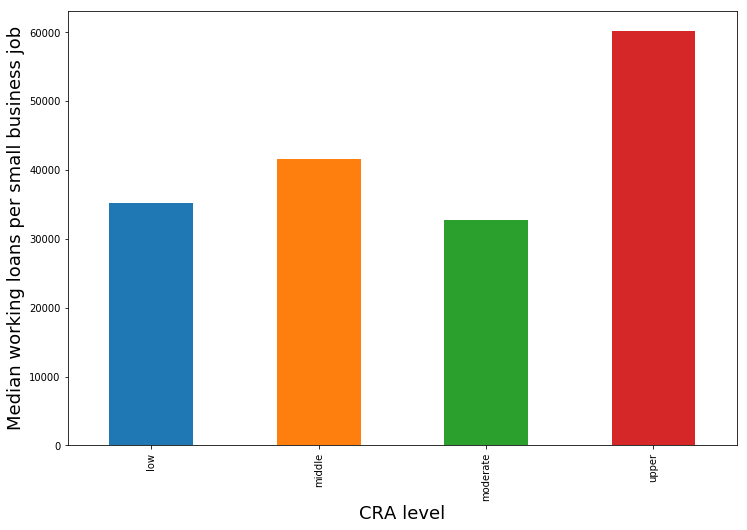

CRA Level,Number of tracts,Median working loansper small business job
low,76,"$35,165"
middle,27,"$41,548"
moderate,61,"$32,750"
upper,18,"$60,179"


In [8]:
cra_level_df = pandas.DataFrame()
cra_level_df = cra_level_df.assign(nTracts = census_tracts_df[
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
].groupby('cra_level').size())

cra_level_df = cra_level_df.assign(median_amtWorkingLoans_adj_per_sbjob = census_tracts_df[
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
].groupby('cra_level')['amtWorkingLoans_adj_per_sbjob'].median())

fig, ax = plt.subplots(1,1, figsize=(12*scale, 8*scale))
cra_level_df['median_amtWorkingLoans_adj_per_sbjob'].plot.bar(ax=ax)#, color='gold')

plt.xlabel('CRA level', fontsize=18*scale)
plt.ylabel('Median working loans per small business job', fontsize=18*scale)
#plt.legend(['Median loan amount\nper small business job\n(2017 USD)'], fontsize=16*scale)
plt.show()

htmlstring = '<table>'
htmlstring += '<tr>'
htmlstring += '<th>CRA Level</th>'
htmlstring += '<th>Number of tracts</th>'
htmlstring += '<th>Median working loans<br />per small business job</th>'
htmlstring += '</tr>'

for ix, thisrow in cra_level_df.iterrows():
    htmlstring += '<tr>'
    htmlstring += '<td>{0:}</td>'.format(ix)
    htmlstring += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    htmlstring += '<td>${0:,.0f}</td>'.format(thisrow['median_amtWorkingLoans_adj_per_sbjob'])
    htmlstring += '</tr>'
    #['median_amtWorkingLoans_adj_per_sbjob']
htmlstring += '</table>'

display(HTML(htmlstring))

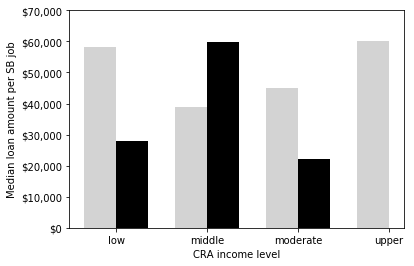

CRA level,Number ofTracts,Median loan valueper SB job
Low,14,"$58,122"
Middle,23,"$38,866"
Moderate,22,"$45,138"
Upper,18,"$60,179"
CRA level,Number ofTracts,Median loan valueper SB job
Low,62,"$28,044"
Middle,4,"$59,656"
Moderate,39,"$22,260"
Upper,0,N/A


In [9]:
cra_level_race_df = pandas.DataFrame()
cra_level_race_df = cra_level_race_df.assign(nTracts = census_tracts_df[
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
].groupby(['excess_race','cra_level']).size())

cra_level_race_df = cra_level_race_df.assign(median_amtWorkingLoans_adj_per_sbjob = census_tracts_df[
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
].groupby(['excess_race','cra_level'])['amtWorkingLoans_adj_per_sbjob'].median())

cra_level_race_df.loc[('black', 'upper'),  ['nTracts', 'median_amtWorkingLoans_adj_per_sbjob']] = [0, np.nan]
cra_level_race_df = cra_level_race_df.sort_index()

label_sorter = np.arange(4)
width = 0.35

white_medians = cra_level_race_df.xs('white')['median_amtWorkingLoans_adj_per_sbjob'].tolist()
black_medians = cra_level_race_df.xs('black')['median_amtWorkingLoans_adj_per_sbjob'].tolist()
#black_medians[1] = np.nan
#black_medians.append(np.nan)  # for the nonexistent black high-income areas, sigh...

plt.bar(label_sorter, white_medians, width, label='White', color='lightgray')
plt.bar(label_sorter+width, black_medians, width, label='Black', color='black')
plt.xticks(label_sorter + width / 2, ('low', 'middle', 'moderate', 'upper'))
yticks = np.arange(0,80000,10000)
yticklabels = ['${0:,.0f}'.format(x) for x in yticks]
plt.yticks(yticks, yticklabels)
plt.xlabel('CRA income level')
plt.ylabel('Median loan amount per SB job')

plt.show()

htmlString = ''
htmlString += '<p>White</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Median loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_race_df.xs('white').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    htmlString += '<td>${0:,.0f}</td>'.format(thisrow['median_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 

htmlString += '<p>Black</p>'
htmlString += '<table>'
htmlString += '<tr><th>CRA level</th><th>Number of<br />Tracts</th><th>Median loan value<br />per SB job</th></tr>'
for ix, thisrow in cra_level_race_df.xs('black').iterrows():
    htmlString += '<tr>'
    htmlString += '<td>{0:}</td>'.format(ix.capitalize())
    htmlString += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
    if (np.isnan(thisrow['median_amtWorkingLoans_adj_per_sbjob'])):
        htmlString += '<td>N/A</td>'
    else:
        htmlString += '<td>${0:,.0f}</td>'.format(thisrow['median_amtWorkingLoans_adj_per_sbjob'])
    htmlString += '</tr>'
htmlString += '</table>' 
display(HTML(htmlString))

In [21]:
get_columns = ['income_group_code', 'income_group', 'cra_level']
get_columns += ['amtWorkingLoans_adj', 'amtLoansToSmallest_adj']
get_columns += ['pop_total', 'total_householders', 'pop_white', 'pop_black', 'mfi']
get_columns += ['black_householder', 'white_householder']
get_columns += ['Total number of jobs']
get_columns += ['Number of jobs for workers at firms with Firm Size: 0-19 Employees']
get_columns += ['excess_race']

xdf = census_tracts_df[get_columns][
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
    & (census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] >= 25)
]

#xdf = xdf.assign(amtWorkingLoans_adj_per_total_job = xdf['amtWorkingLoans_adj'] / xdf['Total number of jobs'])
xdf = xdf.assign(amtWorkingLoans_adj_per_sb_job = xdf['amtWorkingLoans_adj'] / xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
xdf = xdf.assign(pct_white = xdf['pop_white'] / xdf['pop_total'])
xdf = xdf.assign(pct_black = xdf['pop_black'] / xdf['pop_total'])
print('ok')

ok


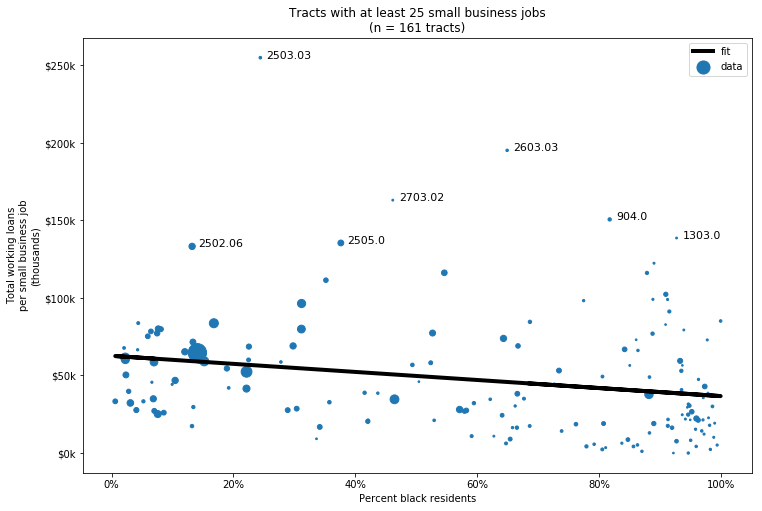

amtWorkingLoans_adj_per_sb_job = $-25,976*pct_black + $62,683 (r^2 = 0.052)


In [30]:
show_labels = True

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    xdf['pct_black'].values, xdf['amtWorkingLoans_adj_per_sb_job'].values
)

fig, (ax1) = plt.subplots(1,1, figsize=(12,8))
s = xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].apply(lambda x: x/10).tolist()

ax1.scatter(xdf['pct_black'], xdf['amtWorkingLoans_adj_per_sb_job'], s=s)
ax1.plot(xdf['pct_black'], slope*xdf['pct_black'] + intercept, color='black', linewidth=4)

ax1.set_xlabel('Percent black residents')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

xticks = np.arange(0, 1.2, 0.2)
xlabels = ['{0:.0%}'.format(x) for x in xticks]
plt.xticks(xticks, xlabels)

yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels)
plt.legend(['fit', 'data'])

if (show_labels):
    for ix, thisrow in xdf.iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sb_job'] > 125000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['pct_black'], thisrow['amtWorkingLoans_adj_per_sb_job']), fontsize=11,
                        xytext=(thisrow['pct_black'] + .01, thisrow['amtWorkingLoans_adj_per_sb_job'] - 500))

ax1.set_title('Tracts with at least 25 small business jobs\n(n = {0:.0f} tracts)'.format(len(xdf)))

plt.show()
print('amtWorkingLoans_adj_per_sb_job = ${0:,.0f}*pct_black + ${1:,.0f} (r^2 = {2:.3f})'.format(slope, intercept, r_value ** 2))

#xdf[['Number of jobs for workers at firms with Firm Size: 0-19 Employees', 'amtWorkingLoans_adj_per_sb_job']].sort_values(by='amtWorkingLoans_adj_per_sb_job', ascending=False)

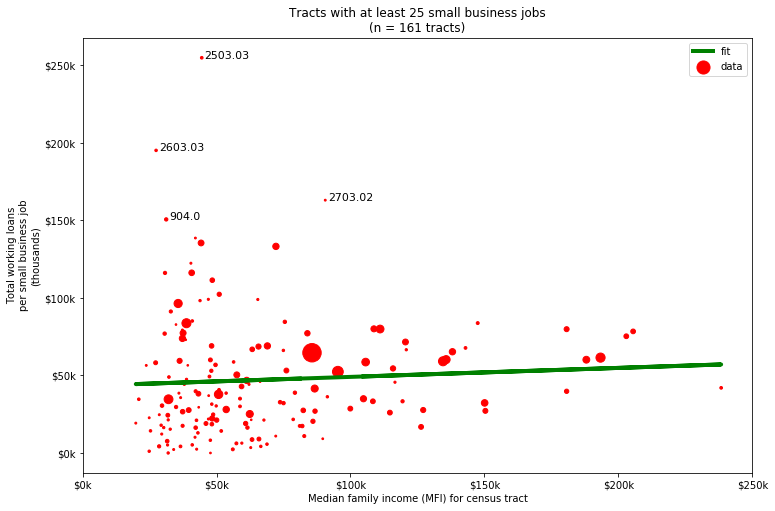

Loans per SB job = 0.058*MFI + $43,273 (r^2 = 0.004)


In [19]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    xdf['mfi'].values,  xdf['amtWorkingLoans_adj_per_sb_job'].values
)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))

s = xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].apply(lambda x: x/10).tolist()
ax1.plot(xdf['mfi'], slope*xdf['mfi'] + intercept, color='green', linewidth=4)
ax1.scatter(
    xdf['mfi'], xdf['amtWorkingLoans_adj_per_sb_job'], color='red', s=s
)

ax1.set_xlabel('Median family income')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

xticks = np.arange(0, 300000, 50000)
xlabels = ['${0:.0f}k'.format(x/1000) for x in xticks]
plt.xticks(xticks, xlabels)

yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels)

ax1.set_xlabel('Median family income (MFI) for census tract')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

plt.legend(['fit', 'data'])
ax1.set_title('Tracts with at least 25 small business jobs\n(n = {0:.0f} tracts)'.format(len(xdf)))

if (show_labels):
    for ix, thisrow in xdf.iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sb_job'] > 150000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['mfi'], thisrow['amtWorkingLoans_adj_per_sb_job']), fontsize=11,
                        xytext=(thisrow['mfi'] + 1000, thisrow['amtWorkingLoans_adj_per_sb_job'] - 500))

plt.show()

if (intercept >= 0):
    sign = '+'
else:
    sign = '-'
if (intercept >= 0):
    sign = '+'
else:
    sign = '-'

print('Loans per SB job = {0:.3f}*MFI {1:} ${2:,.0f} (r^2 = {3:.3f})'.format(slope, sign, intercept, r_value**2))

#print(slopew, interceptw, slopeb, interceptb)

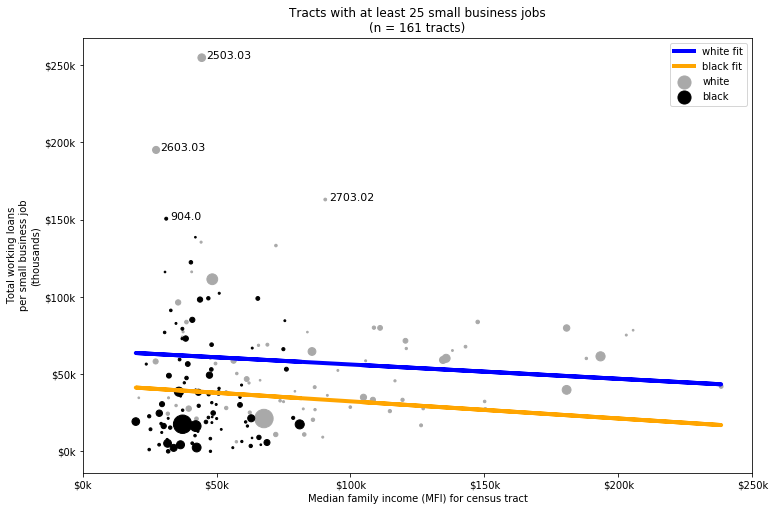

Whiter-than-city-average tracts: Loans per SB job = -0.093*MFI + $65,496 (r^2 = 0.012)
Blacker-than-city-average tracts: Loans per SB job = -0.111*MFI + $43,457 (r^2 = 0.002)


In [33]:
show_labels = True
slopew, interceptw, r_valuew, p_valuew, std_errw = scipy.stats.linregress(
    xdf['mfi'][xdf['excess_race'] == 'white'].values,  xdf['amtWorkingLoans_adj_per_sb_job'][xdf['excess_race'] == 'white'].values
)
slopeb, interceptb, r_valueb, p_valueb, std_errb = scipy.stats.linregress(
    xdf['mfi'][xdf['excess_race'] == 'black'].values,  xdf['amtWorkingLoans_adj_per_sb_job'][xdf['excess_race'] == 'black'].values
)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))

s = xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].apply(lambda x: x/10).tolist()
ax1.scatter(
    xdf[xdf['excess_race'] == 'white']['mfi'], xdf[xdf['excess_race'] == 'white']['amtWorkingLoans_adj_per_sb_job'], 
    color='darkgray', s=s
)
ax1.scatter(
    xdf[xdf['excess_race'] == 'black']['mfi'], xdf[xdf['excess_race'] == 'black']['amtWorkingLoans_adj_per_sb_job'], 
    color='black', s=s
)

ax1.plot(xdf['mfi'], slopew*xdf['mfi'] + interceptw, color='blue', linewidth=4)
ax1.plot(xdf['mfi'], slopeb*xdf['mfi'] + interceptb, color='orange', linewidth=4)

#ax1.plot(xdf['pct_black'], slope*xdf['pct_black'] + intercept, color='black', linewidth=4)

ax1.set_xlabel('Median family income')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

xticks = np.arange(0, 300000, 50000)
xlabels = ['${0:.0f}k'.format(x/1000) for x in xticks]
plt.xticks(xticks, xlabels)

yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels)

ax1.set_xlabel('Median family income (MFI) for census tract')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

plt.legend(['white fit', 'black fit', 'white', 'black'])
ax1.set_title('Tracts with at least 25 small business jobs\n(n = {0:.0f} tracts)'.format(len(xdf)))

if (show_labels):
    for ix, thisrow in xdf.iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sb_job'] > 150000):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['mfi'], thisrow['amtWorkingLoans_adj_per_sb_job']), fontsize=11,
                        xytext=(thisrow['mfi'] + 1500, thisrow['amtWorkingLoans_adj_per_sb_job'] - 500))

plt.show()
#xdf.columns.tolist()
if (interceptw >= 0):
    signw = '+'
else:
    signw = '-'
if (interceptb >= 0):
    signb = '+'
else:
    signb = '-'

print('Whiter-than-city-average tracts: Loans per SB job = {0:.3f}*MFI {1:} ${2:,.0f} (r^2 = {3:.3f})'.format(slopew, signw, interceptw, r_valuew**2))
print('Blacker-than-city-average tracts: Loans per SB job = {0:.3f}*MFI {1:} ${2:,.0f} (r^2 = {3:.3f})'.format(slopeb, signb, interceptb, r_valueb**2))

#print(slopew, interceptw, slopeb, interceptb)